In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

In [3]:
df = pd.read_csv('Insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# EDA

### Univariate Analysis

Age Column

<AxesSubplot:xlabel='age', ylabel='Count'>

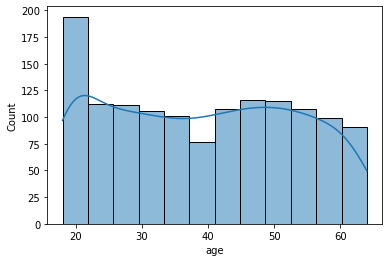

In [10]:
sns.histplot(x=df.age,kde=True)

Sex Column

In [12]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<AxesSubplot:title={'center':'Sex Column in Data'}, xlabel='sex', ylabel='count'>

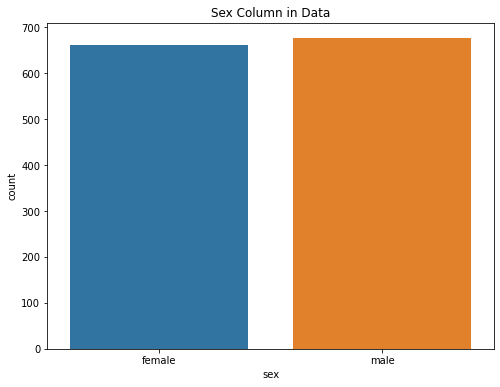

In [13]:
plt.figure(figsize=(8,6))
plt.title('Sex Column in Data')
sns.countplot(x=df['sex'])

Children Column

In [14]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<AxesSubplot:title={'center':'Children Column in Data'}, xlabel='children', ylabel='count'>

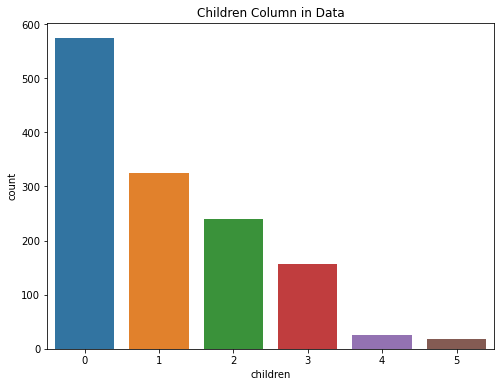

In [16]:
plt.figure(figsize=(8,6))
plt.title('Children Column in Data')
sns.countplot(x=df['children'])

Smoker Column

<AxesSubplot:title={'center':'Smoker or non smoker'}, xlabel='smoker', ylabel='count'>

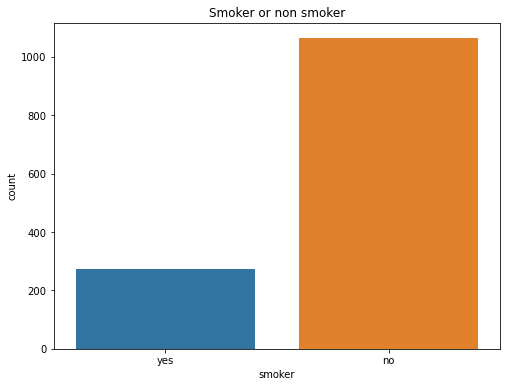

In [19]:
plt.figure(figsize=(8,6))
plt.title('Smoker or non smoker')
sns.countplot(x=df['smoker'])

Region Column

<AxesSubplot:title={'center':'Region Column in Data'}, xlabel='region', ylabel='count'>

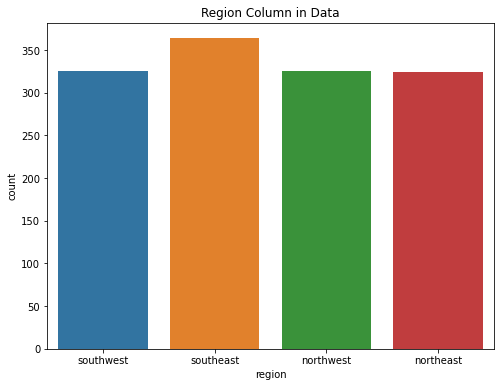

In [20]:
plt.figure(figsize=(8,6))
plt.title('Region Column in Data')
sns.countplot(x=df['region'])

Charges Column

<AxesSubplot:title={'center':'Charges Column in Data'}, xlabel='charges', ylabel='Count'>

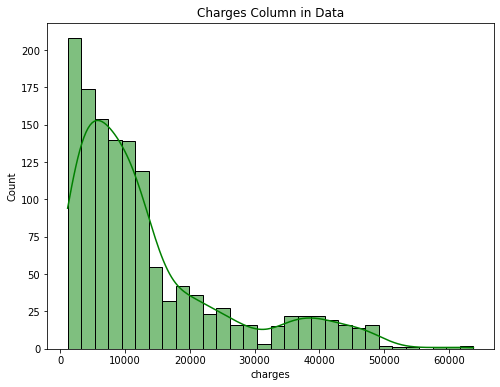

In [52]:
plt.figure(figsize=(8,6))
plt.title('Charges Column in Data')
sns.histplot(x=df['charges'],kde=True,color='g')

Data is Right Skewed. So applying log transformation

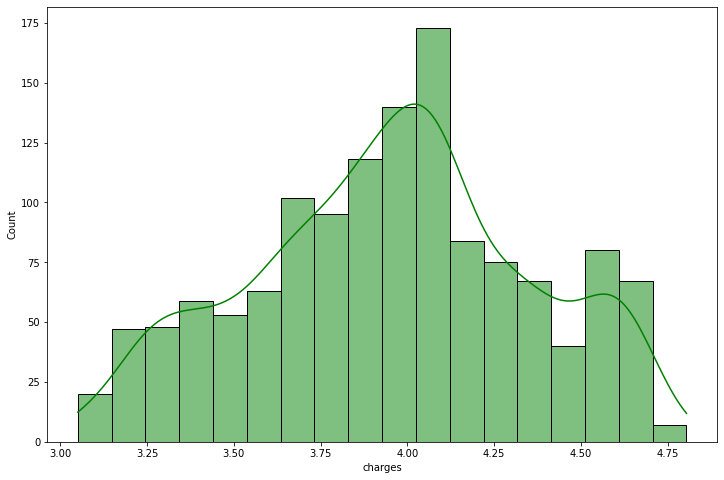

In [34]:
a, axis = plt.subplots(1, 1, figsize=(12, 8))
axis = sns.histplot(np.log10(df['charges']), kde = True, color = 'g' )

### Bi-Variate Analysis

Age vs Charges

<AxesSubplot:title={'center':'Age vs Charges'}, xlabel='age', ylabel='charges'>

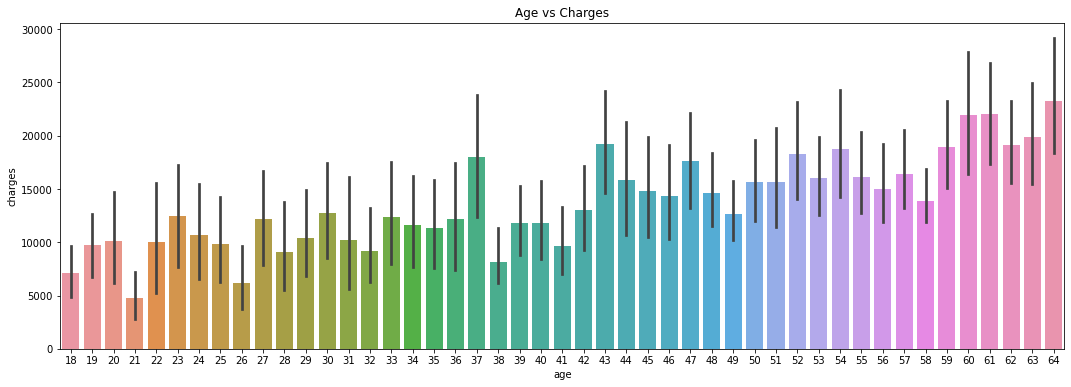

In [60]:
plt.figure(figsize=(18,6))
plt.title('Age vs Charges')
sns.barplot(x=df['age'],y=df['charges'])

Children vs Charges

<AxesSubplot:title={'center':'Children vs Charges'}, xlabel='children', ylabel='charges'>

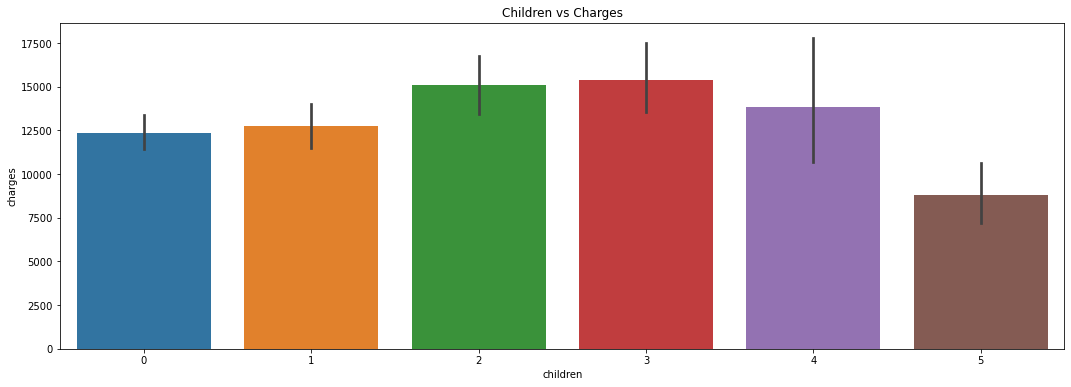

In [62]:
plt.figure(figsize=(18,6))
plt.title('Children vs Charges')
sns.barplot(x=df['children'],y=df['charges'])

Smoker vs Charges

<AxesSubplot:title={'center':'Smoker vs Charges'}, xlabel='smoker', ylabel='charges'>

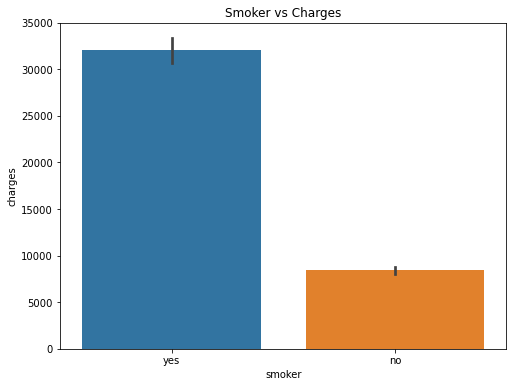

In [64]:
plt.figure(figsize=(8,6))
plt.title('Smoker vs Charges')
sns.barplot(x=df['smoker'],y=df['charges'])

Region vs Charges

<AxesSubplot:title={'center':'Region vs Charges'}, xlabel='region', ylabel='charges'>

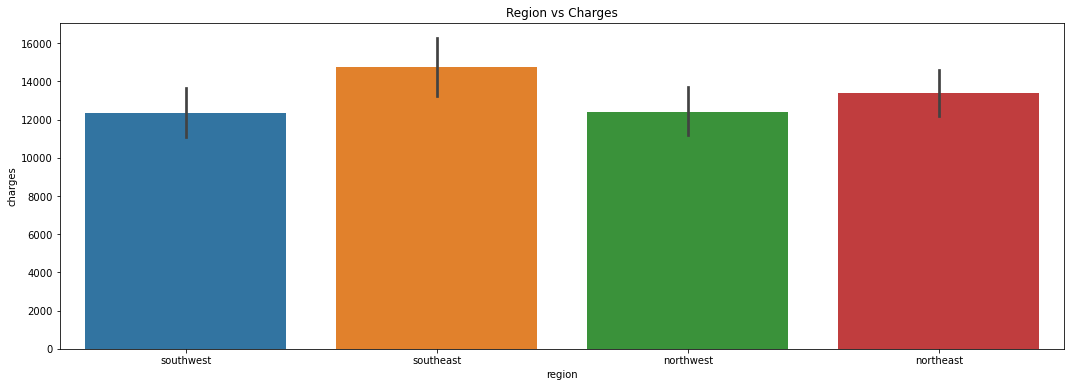

In [65]:
plt.figure(figsize=(18,6))
plt.title('Region vs Charges')
sns.barplot(x=df['region'],y=df['charges'])

<AxesSubplot:xlabel='region'>

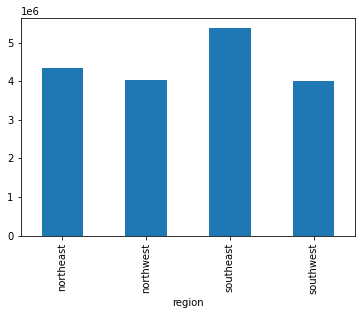

In [88]:
df['charges'].groupby(df['region']).sum().plot(kind='bar')

## Multi-variate Analysis

Age vs Charges on smoker

<AxesSubplot:title={'center':'Age vs Charges vs Smoker'}, xlabel='age', ylabel='charges'>

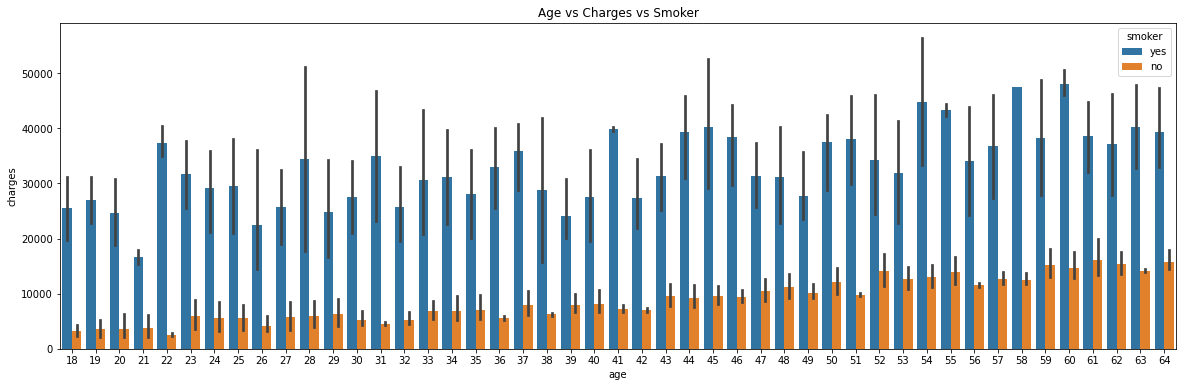

In [92]:
plt.figure(figsize=(20,6))
plt.title('Age vs Charges vs Smoker')
sns.barplot(x=df['age'],y=df['charges'],hue=df['smoker'])

Age vs Charges vs Sex

<AxesSubplot:title={'center':'Age vs Charges vs Sex'}, xlabel='age', ylabel='charges'>

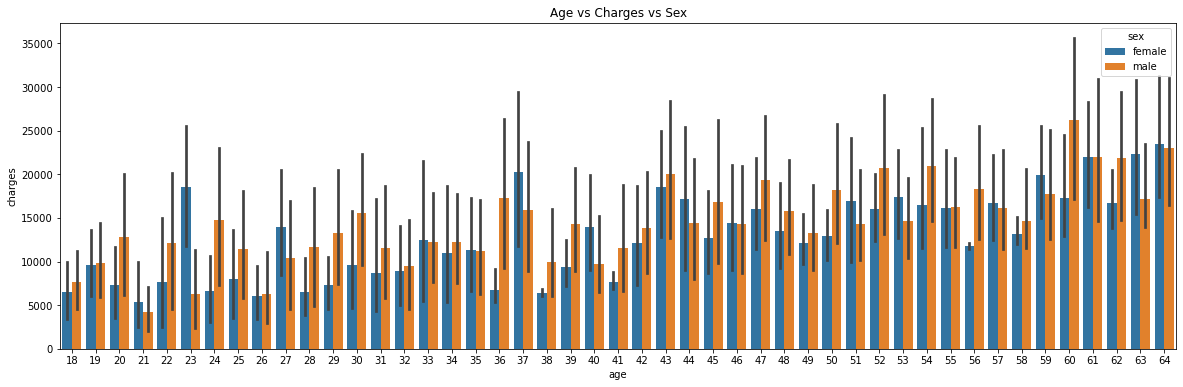

In [95]:
plt.figure(figsize=(20,6))
plt.title('Age vs Charges vs Sex')
sns.barplot(x=df['age'],y=df['charges'],hue=df['sex'])

Sex vs Charges vs Smoker

<AxesSubplot:title={'center':'Sex vs Charges vs Smoker'}, xlabel='sex', ylabel='charges'>

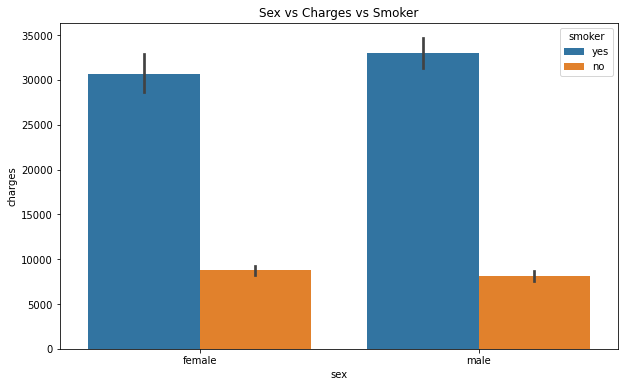

In [97]:
plt.figure(figsize=(10,6))
plt.title('Sex vs Charges vs Smoker')
sns.barplot(x=df['sex'],y=df['charges'],hue=df['smoker'])

In [ ]:
Region vs Charges vs Smoker

<AxesSubplot:title={'center':'Region vs Charges vs Smoker'}, xlabel='region', ylabel='charges'>

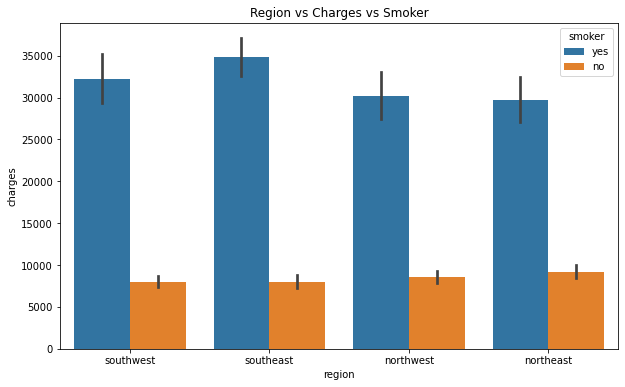

In [99]:
plt.figure(figsize=(10,6))
plt.title('Region vs Charges vs Smoker')
sns.barplot(x=df['region'],y=df['charges'],hue=df['smoker'])

Region vs Charges vs Sex

<AxesSubplot:title={'center':'Region vs Charges vs Smoker'}, xlabel='region', ylabel='charges'>

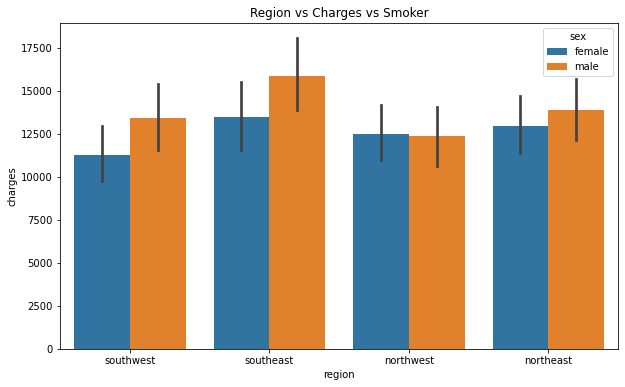

In [101]:
plt.figure(figsize=(10,6))
plt.title('Region vs Charges vs Smoker')
sns.barplot(x=df['region'],y=df['charges'],hue=df['sex'])

Region vs Charges vs children

<AxesSubplot:title={'center':'Region vs Charges vs Children'}, xlabel='region', ylabel='charges'>

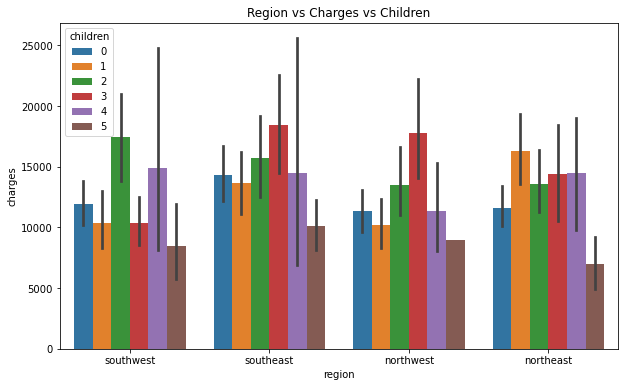

In [103]:
plt.figure(figsize=(10,6))
plt.title('Region vs Charges vs Children')
sns.barplot(x=df['region'],y=df['charges'],hue=df['children'])

## Label Encoding

In [114]:
df['sex'] = df['sex'].map({'male':0,'female':1})
df['smoker'] = df['smoker'].map({'no':0,'yes':1})
df['region'] = df['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [115]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


## Checking Correlation

<AxesSubplot:>

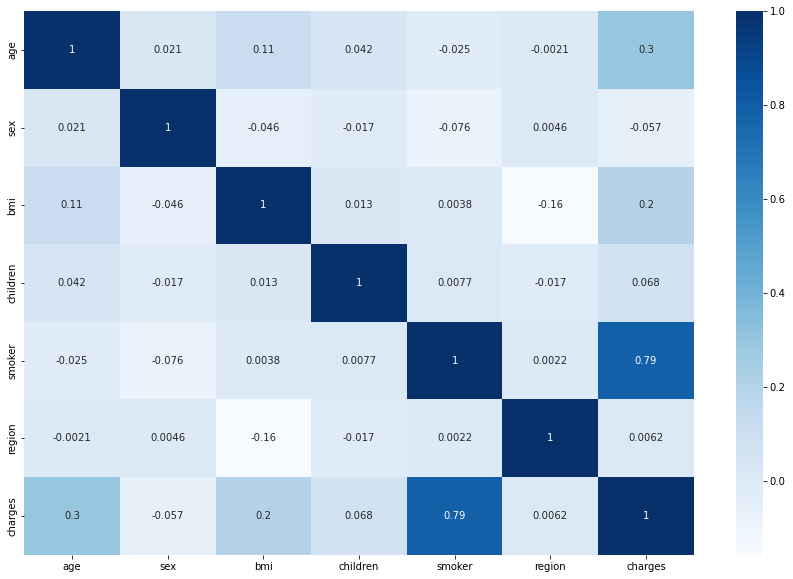

In [116]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

## Inference from data
1. Smoker column has a very high impact on the Charges column. 
2. Next is the age column with a light impact

## Train_Test Split

In [119]:
X = df.drop(columns=['charges'])
y = df['charges']

In [120]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

## Model Building

I have use the following Algorithms in this project
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. Random Forest Regression


## Linear Regression

In [135]:
lr = LinearRegression()

In [136]:
lr.fit(X_train,y_train)

LinearRegression()

In [138]:
lrpred = lr.predict(X_test)

In [123]:
print('Accuracy: ',lr.score(X_test,y_test))

Accuracy:  0.7833463107364539


In [140]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lrpred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lrpred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lrpred)))

Mean Absolute Error: 4186.508898366435
Mean Squared Error: 33635210.431178406
Root Mean Squared Error: 5799.587091438356


## Ridge Regression

In [124]:
ridge = Ridge(alpha=0.5)

In [125]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.5)

In [141]:
rpred = ridge.predict(X_test)

In [126]:
print('Accuracy: ',ridge.score(X_test,y_test))

Accuracy:  0.7832200105774039


In [142]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rpred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rpred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rpred)))

Mean Absolute Error: 4192.320051003921
Mean Squared Error: 33654818.37065814
Root Mean Squared Error: 5801.277305099123


## Lasso Regression

In [127]:
lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,tol=0.0001, warm_start=False, 
              positive=False, random_state=None, selection='cyclic')

In [128]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.2)

In [143]:
lpred = lasso.predict(X_test)

In [129]:
print('Accuracy: ',lasso.score(X_test,y_test))

Accuracy:  0.7833410023117899


In [144]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lpred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lpred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lpred)))

Mean Absolute Error: 4186.656438164467
Mean Squared Error: 33636034.55737369
Root Mean Squared Error: 5799.658141422966


## Random Forest Regression

In [130]:
ranforreg = RandomForestRegressor(n_estimators = 100, criterion = 'mse',random_state = 1,n_jobs = -1)

In [131]:
ranforreg.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=1)

In [145]:
rfpred = ranforreg.predict(X_test)

In [147]:
print('Accuracy: ',ranforreg.score(X_test,y_test))

Accuracy:  0.8661794202538212


In [146]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lrpred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lrpred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lrpred)))

Mean Absolute Error: 4186.508898366435
Mean Squared Error: 33635210.431178406
Root Mean Squared Error: 5799.587091438356


## Pickle dump

In [148]:
import pickle
pickle.dump(ranforreg,open('RandomForestRegressor.pkl','wb'))